# **Super Store Data Analysis**



**Problem Statement**:  Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices.This Store has been making good sales from 2014 to 2017,where everything seemed to be running smoothly - sales were soaring and customers were flooding through the doors. But behind the scenes, a mystery was brewing. Despite these impressive numbers, the store was grappling with a huge financial loss.

Our task is to analyse the sales data and identify weak areas and opportunities for Super Store to boost business growth.

**Description**: In this dataset, we have many features like ship mode, Segment, country, City, State, Postal code, Region, category, sub-category, sales, Quantity, and discount, and the Dependent variable is profit. The remaining are independent variables.
Here we will see weak areas where there is less Sales and will see how to
overcome it.

* **Import Necessary Modules**

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

* **Read the data. Making sure you the data in your current working directory makes it easier.**

In [19]:
import pandas as pd
df1= pd.read_csv("/content/drive/MyDrive/odin_school/super_store_analysis.csv")

* **Understanding the data**

In [20]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df1.shape

(9994, 21)

In [22]:
df1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **Data Cleaning**

With the understanding that Data tells stories, it is important that it is clean before any analysis is made. As the saying goes, Garbage In, Garbage Out.

*  The country code was removed as it was repeated through out. This in corrected in the line of code below.

In [24]:
df1.drop(['Country'], inplace = True, axis = 1)

In [25]:
df1.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* Check for duplicates in the dataset and remove them

In [26]:
df1.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [27]:
df1.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

* General information from the dataset was retrieved in the line of code below to under the datatype of each column. Observng closely, it is seen that some datatypes of columns are wrong. Take for instance, the OrderDate column is represented as an Object datatype when it s supposed to be a Datetime datatype.
* This was be corrected later in the analysis.


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

* **checking the datatype of the OrderDate Column**

In [29]:
df1['Ship Date']= pd.to_datetime(df1['Ship Date'])
df1['Order Date']= pd.to_datetime(df1['Order Date'])
df1['Order Date'].info()
df1['Ship Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Ship Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


* **New columns were added to the dataset in order to easy analyze the data in the dataset.**

In [30]:
df1['year']=df1['Order Date'].dt.year
df1['month']=df1['Order Date'].dt.month
df1['Total_sales']=df1['Quantity']*df1['Sales']

In [31]:

df1.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,Total_sales
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,523.92


# **Data Analysis**

* **Region wise sales**

In [33]:
df2= df1.groupby('Region')['Total_sales'].sum().sort_values(ascending=False)
df2

Region
West       3.595228e+06
East       3.379326e+06
Central    2.475833e+06
South      2.037675e+06
Name: Total_sales, dtype: float64

Highest Sales were happend in "West" Region and Lowest sales were happend in "South" Region of US

*  **category wise sales**


<Axes: xlabel='Category', ylabel='count'>

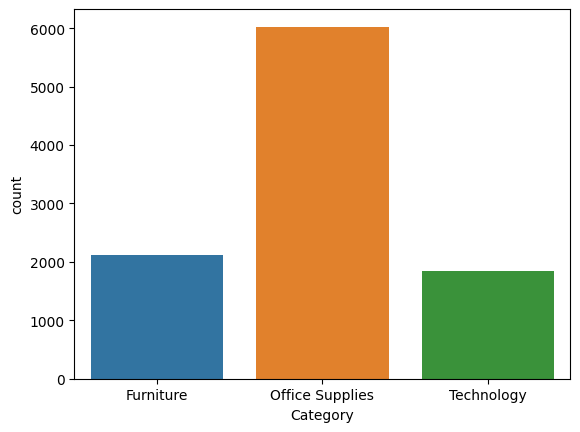

In [15]:
plot = sns.countplot(x=df1['Category'])
plot


As shown in the above lines of code:

* Office Supplies is the best performing category
* Furniture is the second best performing category
* Technology is the least performing category

* **Top 10 product which has highest sales**

In [45]:
df2= df1.groupby(['Sub-Category'])['Quantity'].sum().sort_values(ascending=False)
df2.head(10)


Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Name: Quantity, dtype: int64

We see "Binders" were the most sold category and "Labels" is the least sold category

* **Profit over the  years**

<Axes: xlabel='year', ylabel='Profit'>

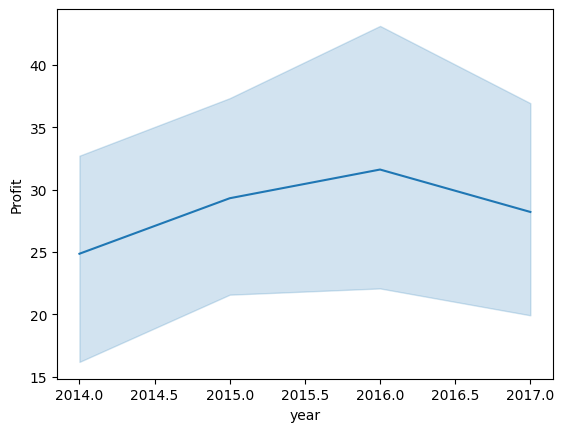

In [ ]:
sns.lineplot(data=df1,x=df1['year'],y=df1['Profit'])

* **Total sales  over a months**

<Axes: xlabel='year', ylabel='Total_sales'>

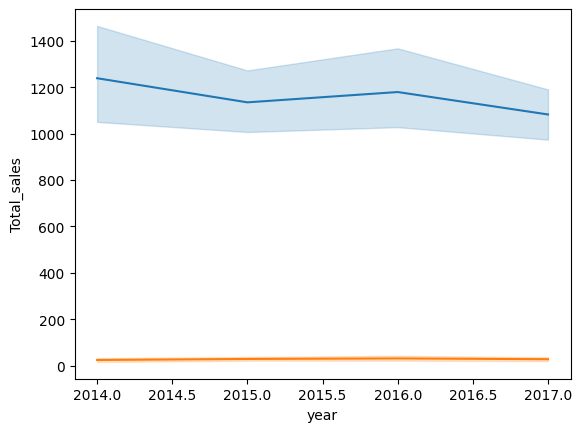

In [48]:
sns.lineplot(data=df1,x=df1['year'],y=df1['Total_sales'])


([<matplotlib.patches.Wedge at 0x7d850c849a50>,
 [Text(0.9227553898140916, 0.5987674762117964, 'Technology'),
  Text(-1.0955149983862824, 0.09923148850391965, 'Office Supplies'),
  Text(0.8649780467629423, -0.6795682295532696, 'Furniture')])

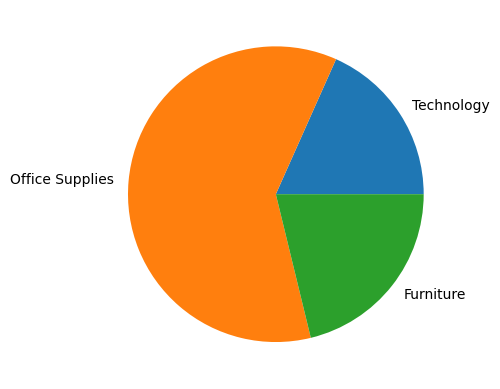

In [50]:
top=df1.groupby(['Category'])['Quantity'].sum().reset_index()
data=top.sort_values('Category',ascending=False)
top_data=data.head(10).reset_index()
top_data
plt.pie(top_data['Quantity'],labels=top_data['Category'])

In [41]:
top_spender=df1.groupby(['City'])['Total_sales'].sum().reset_index()
data=top_spender.sort_values('Total_sales',ascending=False)
top_data=data.head(10).reset_index()
top_data

,index,City,Total_sales
0,329,New York City,1.263478e+06
1,266,Los Angeles,8.732093e+05
2,452,Seattle,5.976152e+05
3,374,Philadelphia,5.677739e+05
4,438,San Francisco,5.414257e+05
5,207,Houston,3.060533e+05
6,123,Detroit,2.704153e+05
7,437,San Diego,2.605732e+05
8,216,Jacksonville,2.417714e+05
9,464,Springfield,2.348053e+05


**# Top 10 city and there Sales**

([<matplotlib.patches.Wedge at 0x7d850c9aceb0>,
 [Text(0.7899468715842299, 0.7654958785482049, 'New York City'),
  Text(-0.5278518653247998, 0.9650763743212915, 'Los Angeles'),
  Text(-1.0833321209515676, 0.190765604118191, 'Seattle'),
  Text(-0.9459463774045688, -0.561413796655527, 'Philadelphia'),
  Text(-0.3869629011505772, -1.0296891342211634, 'San Francisco'),
  Text(0.17175983642135906, -1.0865075050787767, 'Houston'),
  Text(0.5350330640511352, -0.9611137395605445, 'Detroit'),
  Text(0.8127799518170397, -0.7412076294293597, 'San Diego'),
  Text(0.9983171398480825, -0.46191220841794634, 'Jacksonville'),
  Text(1.0887661718727273, -0.15680632316844614, 'Springfield')])

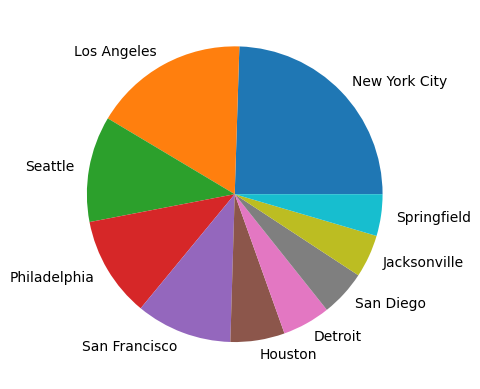

In [42]:
plt.pie(top_data['Total_sales'],labels=top_data['City'])

* **Cities with low sales**

In [43]:
low_spender=df1.groupby(['City'])['Total_sales'].sum().reset_index()
data=top_spender.sort_values('Total_sales',ascending=True)
low_data=data.head(10).reset_index()
low_data

,index,City,Total_sales
0,140,Elyria,1.824
1,221,Jupiter,2.064
2,1,Abilene,2.784
3,370,Pensacola,6.642
4,441,San Luis Obispo,7.240
5,386,Port Orange,7.824
6,354,Ormond Beach,8.424
7,463,Springdale,8.600
8,213,Iowa City,9.990
9,222,Keller,12.000


# **Insights**

*   We see there is less sales and less profit in south region so we need to concentrate on increasing sales in this region.advertising in those cities might help in more sales

*  Category wise "Office supplies" has less sales  compared to other category
even though the discounts given to office supplies we more.The quality might be
the reason for lower sales.

*   It is better to give more discounts during festival seasons, additionally, that will result in more sales.

* There are some Less performing city total sales wise.need to concentrate on these cities too to increase the sales